In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

mon_features = pd.read_csv('/content/drive/MyDrive/ML_Project/mon_features.csv')
mon_labels = pd.read_csv('/content/drive/MyDrive/ML_Project/mon_labels.csv')

unmon_features = pd.read_csv('/content/drive/MyDrive/ML_Project/unmon_features.csv')
unmon_labels = pd.read_csv('//content/drive/MyDrive/ML_Project/unmon_labels.csv')

In [3]:
import numpy as np

features = pd.concat([mon_features, unmon_features], axis=0, ignore_index=True)

mon_labels = np.ones(len(mon_features))
unmon_labels = -np.ones(len(unmon_features))
labels = np.concatenate([mon_labels, unmon_labels])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def scaler_samples(train_X,test_X):
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

X, y = features, labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [5]:
from sklearn.linear_model import LogisticRegression

lr_binary = LogisticRegression()
lr_binary.fit(X_train, y_train)

LogisticRegression()

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = lr_binary.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix\n {conf_matrix}")

Accuracy: 0.6543103448275862
Confusion Matrix
 [[  47 1885]
 [ 120 3748]]


In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(estimator=lr_binary, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [9]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix\n {conf_matrix}")

Accuracy: 0.733103448275862
Confusion Matrix
 [[ 771 1161]
 [ 387 3481]]


### Evaluation Metrics

In [10]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculating True Positive Rate (TPR) and False Positive Rate (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

# Calculating Precision and Recall
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

# Calculating ROC AUC
roc_auc = auc(fpr, tpr)

# Calculating Precision-Recall Curve and AUC
precision_values, recall_values, thresholds_pr = precision_recall_curve(y_test, y_pred, pos_label=1)
pr_auc = auc(recall_values, precision_values)

In [11]:
print(f"True Positive Rate (TPR): {tpr[1]}")
print(f"False Positive Rate (FPR): {fpr[1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")
print(f"Precision-Recall AUC: {pr_auc}")

True Positive Rate (TPR): 0.8999482936918304
False Positive Rate (FPR): 0.6009316770186336
Precision: 0.7498922878069797
Recall: 0.8999482936918304
ROC AUC: 0.6495083083365984
Precision-Recall AUC: 0.8582823597149223


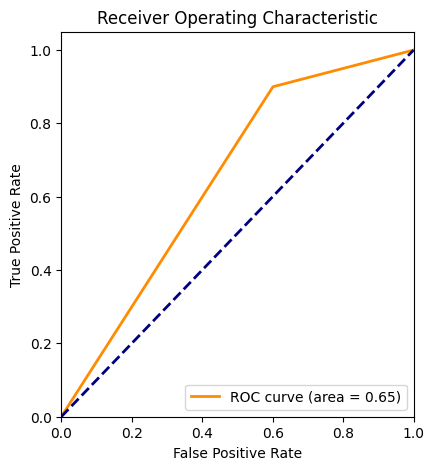

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

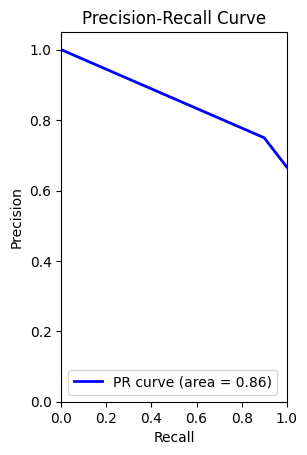

In [13]:
plt.subplot(1, 2, 2)
plt.plot(recall_values, precision_values, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()